In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bike-rental.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.shape

(17379, 17)

In [43]:
# df.describe()

In [40]:
# df.info()

In [41]:
# df.isnull().sum()

In [42]:
# df.isnull().sum().sum()

In [8]:
df.drop(['dteday'],axis=1,inplace=True)

In [9]:
df.shape

(17379, 16)

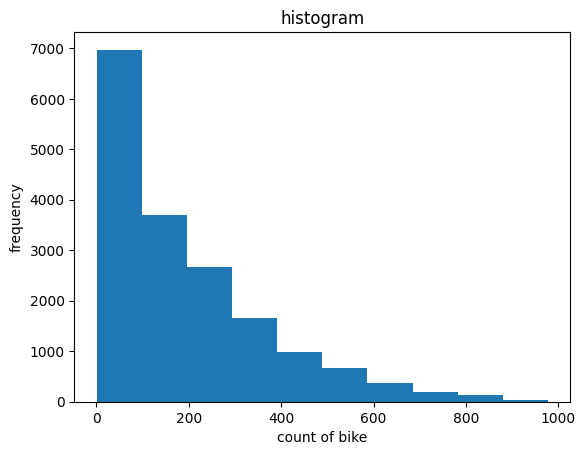

In [11]:
plt.hist(df.cnt)
plt.xlabel('count of bike')
plt.ylabel('frequency')
plt.title('histogram')
plt.show()

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 99)

In [20]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(    
    max_depth=10,
    min_samples_split=10,
    random_state=5,)

In [21]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [22]:
y_pred = reg.predict(x_test)

No, you cannot use the score() method to directly calculate the accuracy of a decision tree regressor. The score() method is typically used with classifiers to calculate accuracy, but it is not applicable to regression models.

`reg.score(x_test,y_test)`

In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 35.64791823855457


In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

35.64791823855457

In [28]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.97058776324028

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg,x_train,y_train,cv=10)

array([0.99893467, 0.99894849, 0.99826968, 0.99877554, 0.99853177,
       0.99821304, 0.99884981, 0.99882942, 0.99901829, 0.9987994 ])

In [38]:
y_pred[:10]

array([104.08888889, 107.34615385, 221.56666667,  13.48837209,
        16.91836735, 323.17142857,   4.        ,  93.84090909,
        60.53846154, 520.125     ])

In [39]:
y_pred[10]

4.0